In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
#pip3 install xlrd
#pip3 install openpyxl

In [3]:
data = pd.read_excel('Dataset Healthcare.xlsx', engine='openpyxl')
print("Shape of data set is: ", data.shape)
df = data

Shape of data set is:  (303, 14)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
x = pd.Series([df[i].value_counts() for i in df.columns], index = df.columns)
y = pd.concat([df.isnull().any(), df.dtypes, x] , axis=1, keys=["IsNull","Type","Values"])
y
#There is no null data skipping imputatation step
#df.isnull().sum().sort_values(ascending= False).head(19)

,IsNull,Type,Values
age,False,int64,58 19 57 17 54 16 59 14 52 13 5...
sex,False,int64,"1 207 0 96 Name: sex, dtype: int64"
cp,False,int64,"0 143 2 87 1 50 3 23 Name: cp, ..."
trestbps,False,int64,120 37 130 36 140 32 110 19 150 ...
chol,False,int64,234 6 204 6 197 6 269 5 212 5 ...
fbs,False,int64,"0 258 1 45 Name: fbs, dtype: int64"
restecg,False,int64,"1 152 0 147 2 4 Name: restecg, dtyp..."
thalach,False,int64,162 11 160 9 163 9 173 8 152 ...
exang,False,int64,"0 204 1 99 Name: exang, dtype: int64"
oldpeak,False,float64,0.0 99 1.2 17 0.6 14 1.0 14 0.8 ...


In [6]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df = df.drop_duplicates()
print("Shape of data set is: ", df.shape)

Shape of data set is:  (302, 14)


<h2>1. Preliminary Analysis</h2>

<h4>1 a) The shape of the dataset is (303, 14). There are 13 features and 1 target variable. There are no missing values but there is one duplicate row.</h4>

<h4>1 b) We have removed the duplicate row by using the "df.drop_duplicates()" command whch resulted in the new dataset shape of (302, 14). There are no missing values</h4>

<h2>2. EDA on the data</h2> 

<h4>2 a) Preliminary statistical summary of the data and the measure of central tendencies and spread of the data</h4>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<h4>2 b) categorical and describe and exploring these variables using the appropriate tools, such as count plot</h4>

In [9]:
print(df.dtypes)
#categorical_features = (df.select_dtypes(include=['object']).columns.values)
#catogorical features are already converted to numerical vaues so skiping this step
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
#categorical_features = (df.select_dtypes(include=['object']).columns.values)
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values


Since the data given to us is already converted to numerical values from the documebtation we believe that the following are

Categorical Features : 
1. sex 
2. cp (ChestPainType)
3. fbs (FastingBS)
4. restecg (RestingECG)
5. exang (ExerciseInducedAngina)
6. slope (ST_Slope)
7. ca
8. thal


Numerical Features : 
1. age 
2. trestbps (RestingBP) 
3. chol (Cholesterol) 
4. thalach (MaxHR achieved)
5. Oldpeak

c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='count'>

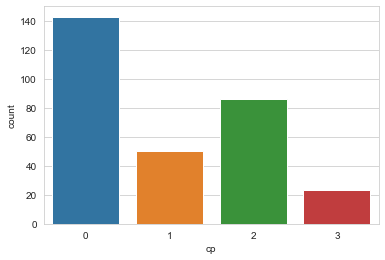

In [11]:
sns.countplot(df['cp']) 

c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

<AxesSubplot:xlabel='thal', ylabel='count'>

<Figure size 7200x5760 with 0 Axes>

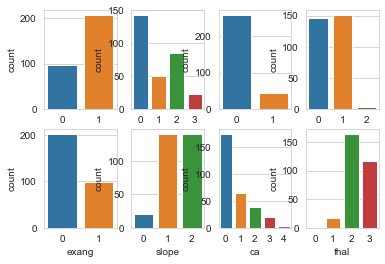

In [13]:
plt.figure(figsize=(10, 8))
fig, ax =plt.subplots(2,4)
sns.countplot(df['sex'], ax=ax[0][0])
sns.countplot(df['cp'], ax=ax[0][1])
sns.countplot(df['fbs'], ax=ax[0][2])
sns.countplot(df['restecg'], ax=ax[0][3])
sns.countplot(df['exang'], ax=ax[1][0])
sns.countplot(df['slope'], ax=ax[1][1])
sns.countplot(df['ca'], ax=ax[1][2])
sns.countplot(df['thal'], ax=ax[1][3])


<h4>2 c) Doing bining as Age is numerical data</h4>

c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


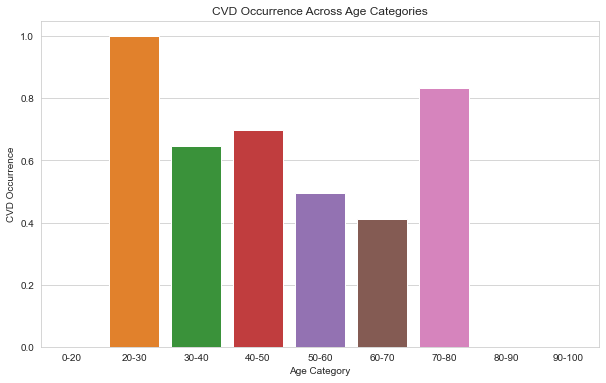

In [13]:
df['Age Category'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Group by age category and calculate the mean of the target variable
age_cvd = df.groupby('Age Category')['target'].mean()

# Plot the result using a bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x=age_cvd.index, y=age_cvd.values)
plt.xlabel('Age Category')
plt.ylabel('CVD Occurrence')
plt.title('CVD Occurrence Across Age Categories')
plt.show()

The bar plot provides a useful visualization of how CVD occurrence varies with age
The mean occurrence of CVD is relatively high in the periods of 20-30 and 70-80 years old.
This is could also mean we have a small dataset to work with.

<h4> d) Composition of all patients with respect to the Sex category </h4>

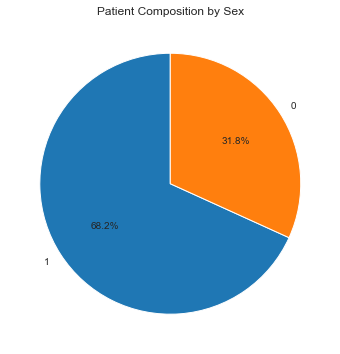

In [14]:
# Count the number of patients by sex
sex_count = df['sex'].value_counts()

# Plot the result using a pie chart
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(x=sex_count.values, labels=sex_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Patient Composition by Sex')
plt.show()

68.2% are male and 31.8% are female.

<h4>2 e) Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient</h4>

c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


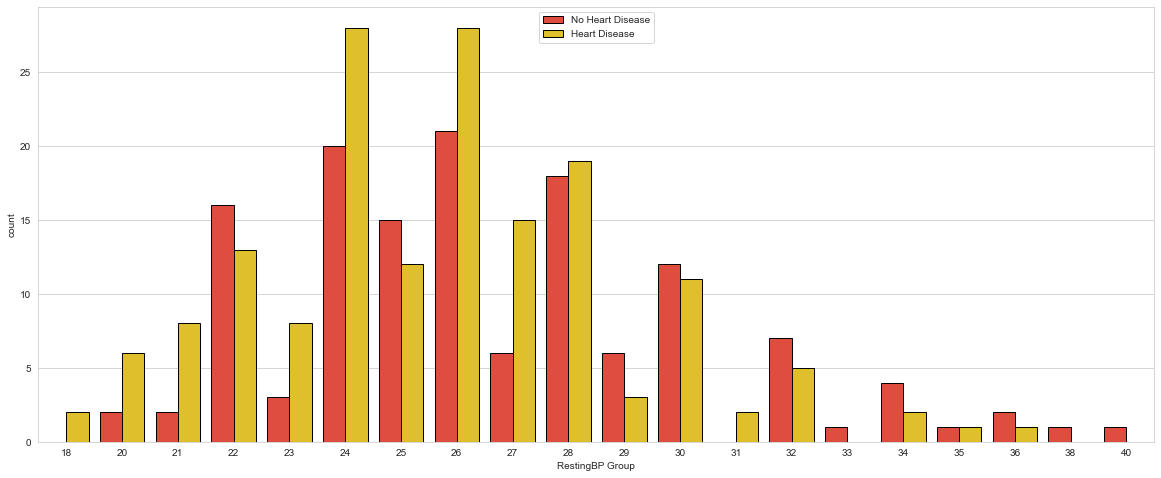

In [15]:
plt.figure(figsize=(20, 8))
colors = ['#F93822','#FDD20E']
df['RestingBP Group'] = [ int(i / 5) for i in df['trestbps']]
sns.countplot(df['RestingBP Group'],data = df,hue = "target",palette = colors, edgecolor = 'black')
plt.legend(['No Heart Disease', 'Heart Disease'])

From the RestingBP group data, 100 (20x5) - 180 (36x5) readings are most prone to be detected with heart diseases.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the dataset into features (X) and target (y)
X = df[['trestbps']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target values on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Accuracy: 0.5409836065573771
Confusion Matrix:
 [[ 4 25]
 [ 3 29]]


c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We used only the trestbps variable as a feature to predict the target variable(Heart attack). 
By training a logistic regression model on this feature and evaluating its accuracy, we can study if one can detect heart attacks based on anomalies in the resting blood pressure of a patient. 
However, to build a more accurate model, we may need to consider other variables in the dataset and use more advanced machine learning algorithms.

<h4>2 f) Describe the relationship between cholesterol levels and a target variable.<h4>

Text(19.799999999999997, 0.5, 'Target variable')

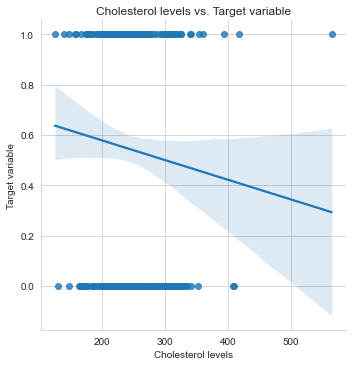

In [17]:
# Create a scatter plot with a regression line
sns.lmplot(x='chol', y='target', data=df)

# Set plot title and labels
plt.title('Cholesterol levels vs. Target variable')
plt.xlabel('Cholesterol levels')
plt.ylabel('Target variable')

The resulting scatter plot shows us that there is a linear relatonship between cholestrol levels and heart attack.

Text(0, 0.5, 'Cholesterol levels')

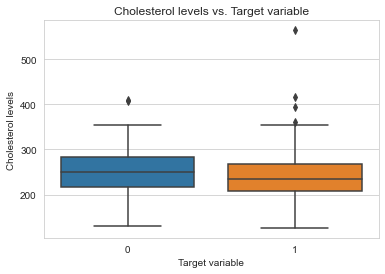

In [19]:
# Create a box plot
sns.boxplot(x='target', y='chol', data=df)

# Set plot title and labels
plt.title('Cholesterol levels vs. Target variable')
plt.xlabel('Target variable')
plt.ylabel('Cholesterol levels')

50% of the peeople who got a heart attack where had cholestrol level between 200 and 275.

c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


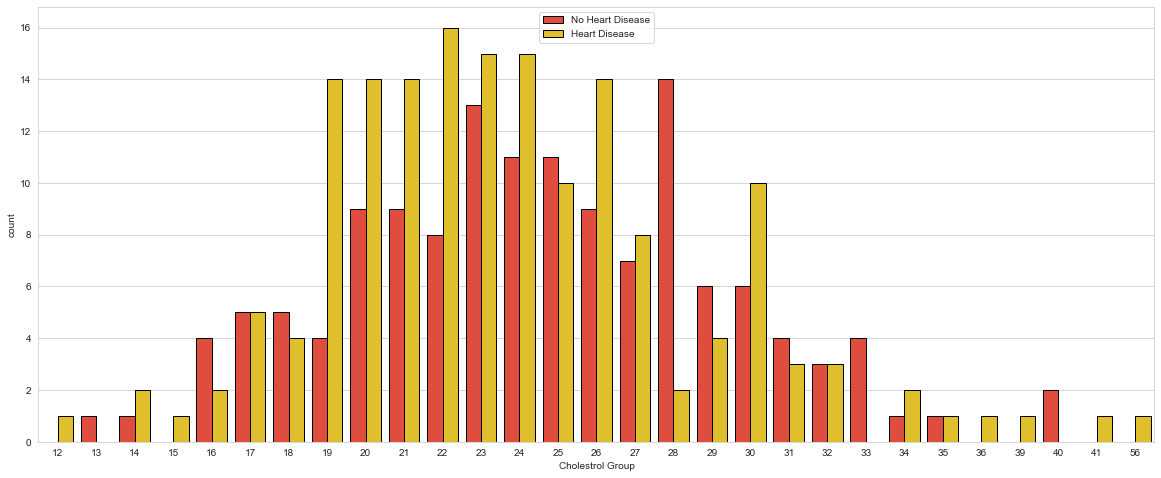

In [20]:
plt.figure(figsize=(20, 8))
colors = ['#F93822','#FDD20E']
df['Cholestrol Group'] = [ int(i / 10) for i in df['chol']]
sns.countplot(df['Cholestrol Group'],data = df,hue = "target",palette = colors, edgecolor = 'black')
plt.legend(['No Heart Disease', 'Heart Disease'])

Cholesterol levels between 160 (16x10) - 560 (56x10) are highly susceptible to heart diseases.

<h4> 2 g) State what relationship exists between peak exercising and the occurrence of a heart attack</h4>

Text(0, 0.5, 'Target variable')

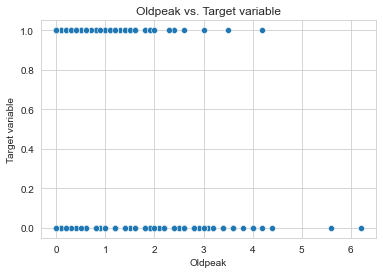

In [21]:
sns.scatterplot(x='oldpeak', y='target', data=df)

# Set plot title and labels
plt.title('Oldpeak vs. Target variable')
plt.xlabel('Oldpeak')
plt.ylabel('Target variable')

Text(0, 0.5, 'Oldpeak')

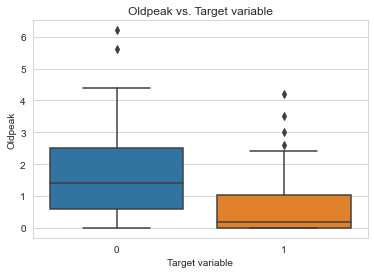

In [22]:
# Create a box plot
sns.boxplot(x='target', y='oldpeak', data=df)

# Set plot title and labels
plt.title('Oldpeak vs. Target variable')
plt.xlabel('Target variable')
plt.ylabel('Oldpeak')

The resulting scatter plot shows the relationship between oldpeak and the occurrence of a heart attack cannot be determined with the plot.
The box plot above visualizes the distribution of oldpeak values for each category of the target variable.

Old peak refers to the ST depression induced by exercise relative to rest, which is one of the variables in the dataset provided. ST depression is a change in the ST segment of the electrocardiogram (ECG) that occurs when the heart muscle is not getting enough oxygen-rich blood. During exercise, the heart muscle requires more oxygen and nutrients to keep up with the increased demand. If there is a blockage or narrowing in the coronary arteries that supply blood to the heart muscle, the ST segment on the ECG may be depressed, indicating that the heart muscle is not getting enough oxygen. Old peak is the difference in the ST segment measurement between the resting ECG and the ECG taken during exercise. A higher old peak value indicates more ST segment depression and can be an indicator of underlying heart disease or risk of a heart attack.
In electrocardiography (ECG), ST refers to the segment of the ECG waveform that occurs between the end of the QRS complex and the beginning of the T wave. The ST segment represents the period between ventricular depolarization and repolarization, and it is a critical part of the ECG waveform because it can help identify certain types of cardiac pathology, such as myocardial ischemia or infarction.

ST segment depression (measured as the amount of deviation below the isoelectric line) is often used as an indicator of myocardial ischemia, while ST segment elevation (measured as the amount of deviation above the isoelectric line) is often associated with myocardial injury or infarction. The ST segment can be affected by a variety of factors, including heart rate, medication, electrolyte imbalances, and underlying cardiac disease.

<h4>2 h) Check if thalassemia is a major cause of CVD</h4>

thal
0    50.000000
1    33.333333
2    78.181818
3    23.931624
Name: CVD_percent, dtype: float64


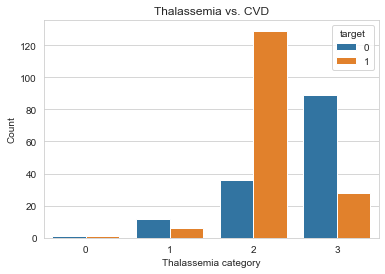

In [14]:
# Create a countplot to visualize the occurrence of CVD for each thalassemia category
sns.countplot(x='thal', hue='target', data=df)

# Set plot title and labels
plt.title('Thalassemia vs. CVD')
plt.xlabel('Thalassemia category')
plt.ylabel('Count')

# Calculate the percentage of CVD cases for each thalassemia category
thal_counts = df.groupby(['thal', 'target']).size().reset_index(name='count')
thal_counts['percent'] = (thal_counts['count'] / df.shape[0]) * 100
thal_pivot = thal_counts.pivot(index='thal', columns='target', values='percent')
thal_pivot['CVD_percent'] = thal_pivot[1] / (thal_pivot[0] + thal_pivot[1]) * 100

# Print the percentage of CVD cases for each thalassemia category
print(thal_pivot['CVD_percent'])

 A pivot table to display the percentage of CVD cases for each thalassemia category.
 People with type 2 and 3 Thalassemia(i.e. Fixed or reversible defects) are more prone to heart attack.
 
Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued.

We can use this information to develop strategies for preventing and managing CVD in patients with thalassemia, such as regular monitoring and screening for cardiovascular risk factors, lifestyle modifications, and appropriate medical interventions.

<h4>2 i) List how the other factors determine the occurrence of CVD </h4>

<b>Age:</b> As age increases, the risk of developing CVD also increases.

<b>Sex:</b> Males have a higher risk of developing CVD compared to females.

<b>Chest pain type (cp):</b> Patients with typical angina (chest pain caused by reduced blood flow to the heart) have a higher risk of developing CVD.

<b>Resting blood pressure (trestbps):</b> Higher resting blood pressure is associated with a higher risk of developing CVD.

<b>Serum cholesterol (chol):</b> Higher serum cholesterol levels are associated with a higher risk of developing CVD.

<b>Fasting blood sugar (fbs):</b> High fasting blood sugar levels are associated with a higher risk of developing CVD.

<b>Resting electrocardiographic results (restecg):</b> Abnormal resting electrocardiographic results are associated with a higher risk of developing CVD.

<b>Maximum heart rate achieved (thalach):</b> Lower maximum heart rate achieved during exercise is associated with a higher risk of developing CVD.

<b>Exercise induced angina (exang):</b> The presence of exercise-induced angina is associated with a higher risk of developing CVD.

<b>ST depression induced by exercise relative to rest (oldpeak):</b> Higher ST depression induced by exercise relative to rest is associated with a higher risk of developing CVD.

<b>Slope of the peak exercise ST segment (slope):</b> A flat or downsloping ST segment during exercise is associated with a higher risk of developing CVD.

<b>Number of major vessels (ca):</b> A higher number of major vessels colored by fluoroscopy is associated with a higher risk of developing CVD.

<b>Thalassemia (thal):</b> Fixed or reversible defects in thalassemia are associated with a higher risk of developing CVD.

<h4> 2 j) Use a pair plot to understand the relationship between all the given variables</h4>

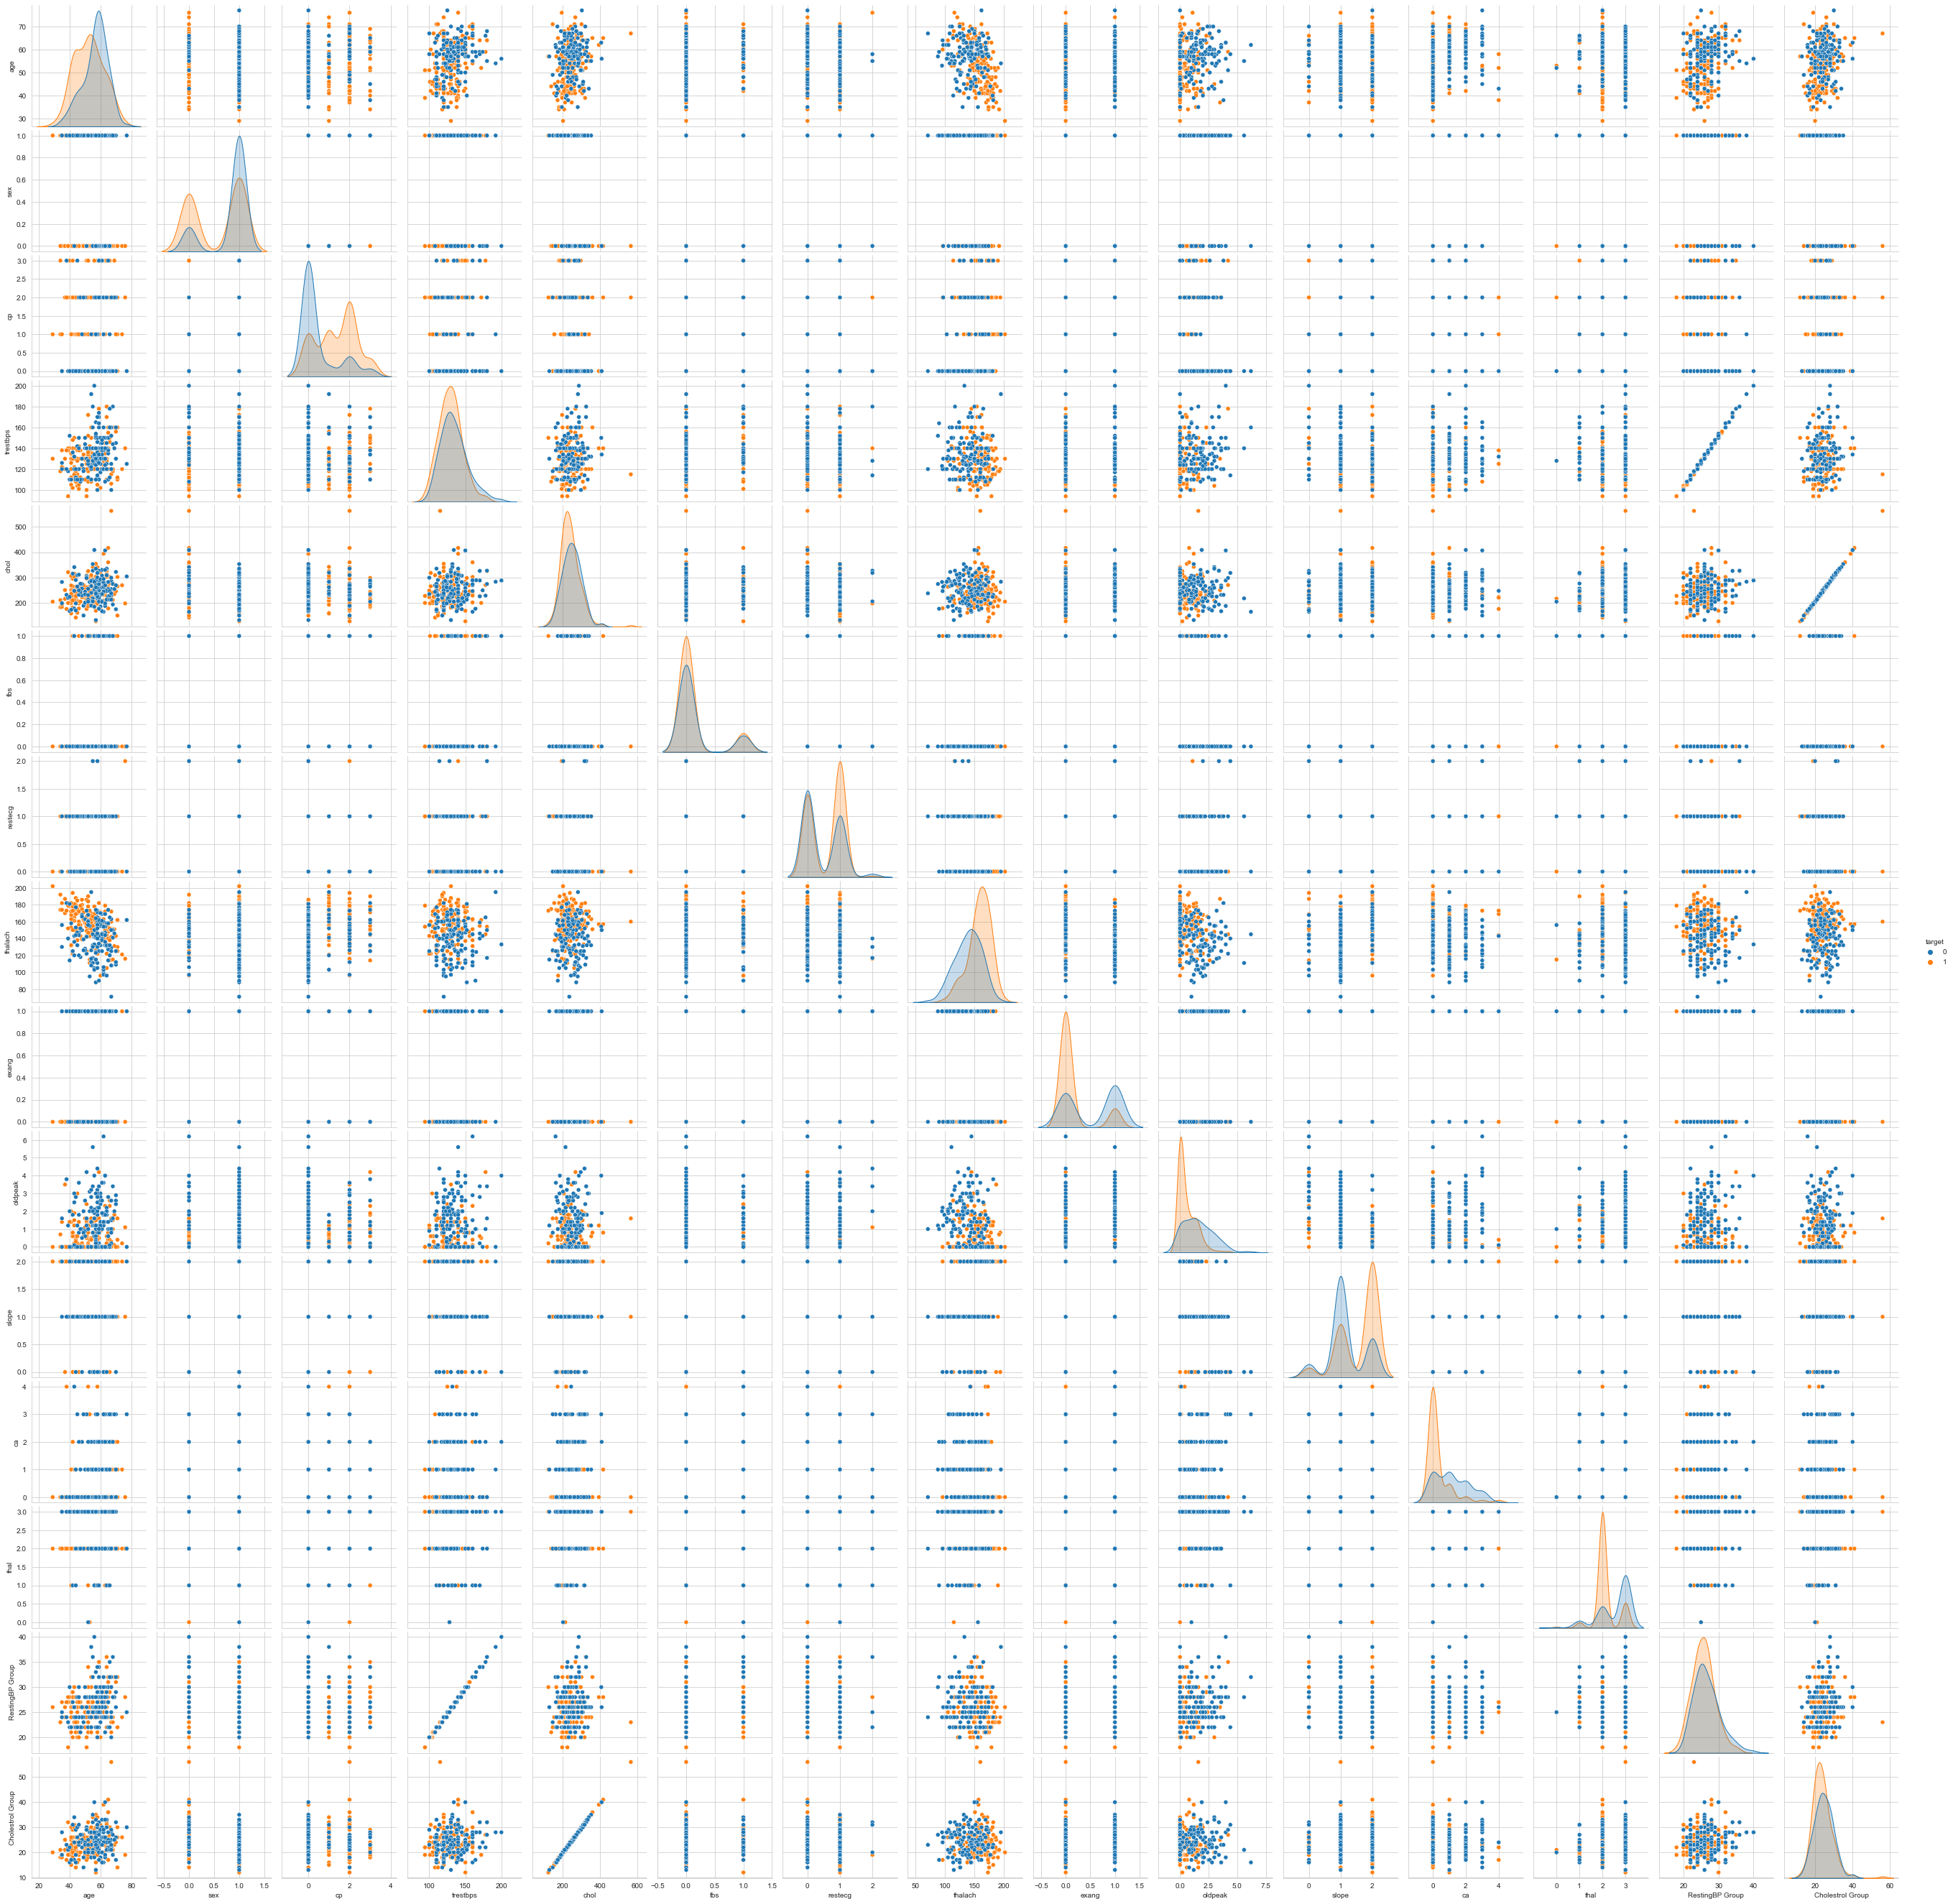

In [24]:
sns.pairplot(data=df, hue='target')
plt.show()

Above are pair plots with scatterplots for each variable combination, showing the relationship between all the variables in the dataset. The hue parameter is set to 'target' to color the scatterplots by the target variable (0 for no CVD and 1 for CVD). 
The diagonal shows the distribution of each variable.

<h2>3 A baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection</h2>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

data = pd.read_excel('Dataset Healthcare.xlsx', engine='openpyxl')
df = data
df = df.drop_duplicates()
print("Shape of data set is: ", df.shape)

Shape of data set is:  (302, 14)


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [28]:
# Baseline logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)
lr_cm = confusion_matrix(y_test, lr_pred)
print('Logistic Regression Confusion Matrix:')
print(lr_cm)

Logistic Regression Accuracy: 0.8360655737704918
Logistic Regression Confusion Matrix:
[[24  5]
 [ 5 27]]


c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# Baseline random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_acc)
rf_cm = confusion_matrix(y_test, rf_pred)
print('Random Forest Confusion Matrix:')
print(rf_cm)


Random Forest Accuracy: 0.8688524590163934
Random Forest Confusion Matrix:
[[26  3]
 [ 5 27]]


<AxesSubplot:>

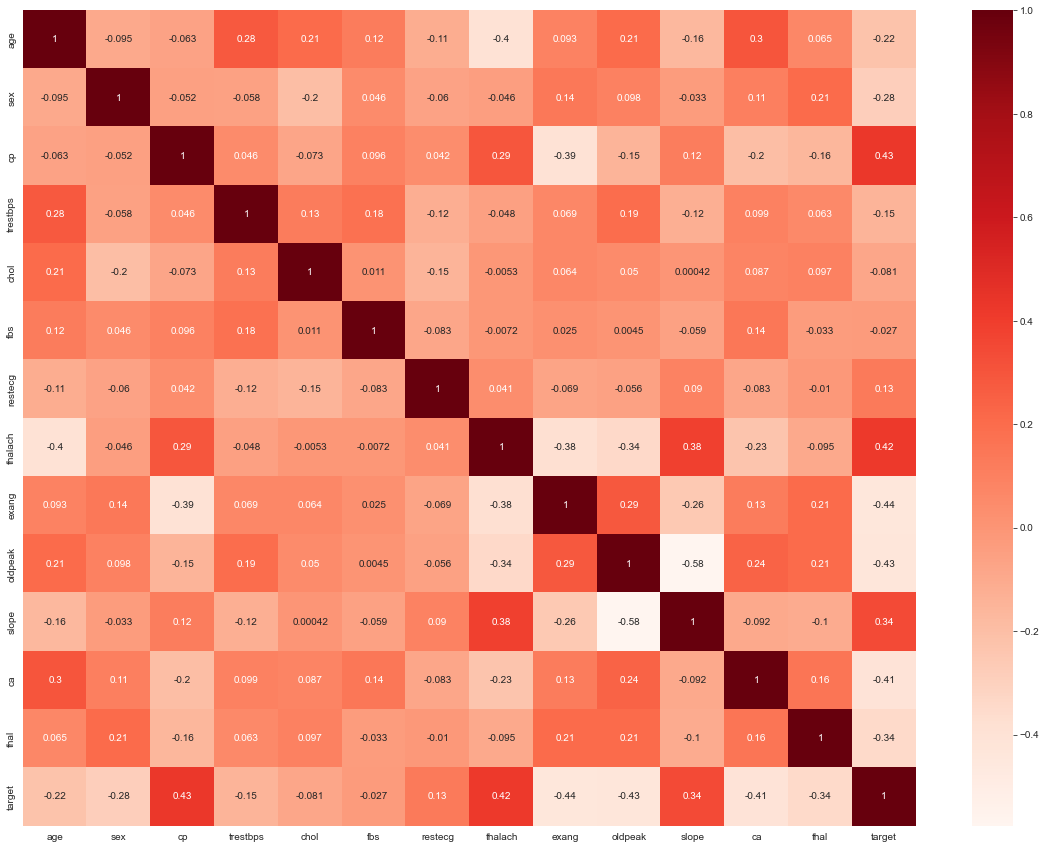

In [30]:
# Correlation analysis and feature selection
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="Reds")

In [31]:
corr_target = abs(corr['target'])
important_features = corr_target[corr_target > 0.3].index.tolist()
print('Important Features:', important_features)


Important Features: ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [32]:
important_features.remove('target')
print(important_features)

['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [33]:
# Logistic regression with selected features
X_train_fs = X_train[important_features]
X_test_fs = X_test[important_features]
lr_fs = LogisticRegression()
lr_fs.fit(X_train_fs, y_train)
lr_fs_pred = lr_fs.predict(X_test_fs)
lr_fs_acc = accuracy_score(y_test, lr_fs_pred)
print('Logistic Regression with Selected Features Accuracy:', lr_fs_acc)
lr_fs_cm = confusion_matrix(y_test, lr_fs_pred)
print('Logistic Regression with Selected Features Confusion Matrix:')
print(lr_fs_cm)

Logistic Regression with Selected Features Accuracy: 0.8524590163934426
Logistic Regression with Selected Features Confusion Matrix:
[[24  5]
 [ 4 28]]


c:\users\farazalim\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# Statistical significance of the logistic regression coefficients
X_train_sm = sm.add_constant(X_train_fs)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print('Logistic Regression Coefficients:')
print(result.params)
print('Logistic Regression P-Values:')
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.395014
         Iterations 7
Logistic Regression Coefficients:
const      0.526801
cp         0.580608
thalach    0.017381
exang     -1.109426
oldpeak   -0.613006
slope      0.627132
ca        -0.868692
thal      -1.278232
dtype: float64
Logistic Regression P-Values:
const      0.748304
cp         0.001791
thalach    0.072267
exang      0.009113
oldpeak    0.009858
slope      0.079081
ca         0.000078
thal       0.000052
dtype: float64


STEPS:

1. Above, we first load the dataset and split it into training and testing sets. We then build a baseline logistic regression model and random forest model, and evaluate their performance using accuracy score and confusion matrix.

2. Next, we perform correlation analysis to identify important features that have a high correlation with the target variable. We select features with a correlation coefficient greater than 0.3 as important features, and build a logistic regression model with the selected features.

3. Finally, we use statsmodels to perform logistic regression with the selected features and examine the coefficients and p-values to identify significant features.
